In [1]:
import geopandas as gpd
import geodatasets
import folium
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [3]:
# Load a dataset of land data on Earth

land = gpd.read_file(geodatasets.get_path("naturalearth.land"))
print(land.head())

  featurecla  scalerank  min_zoom  \
0       Land          1       1.0   
1       Land          1       1.0   
2       Land          1       0.0   
3       Land          1       1.0   
4       Land          1       1.0   

                                            geometry  
0  POLYGON ((-59.57209 -80.04018, -59.86585 -80.5...  
1  POLYGON ((-159.20818 -79.49706, -161.1276 -79....  
2  POLYGON ((-45.15476 -78.04707, -43.92083 -78.4...  
3  POLYGON ((-121.21151 -73.50099, -119.91885 -73...  
4  POLYGON ((-125.55957 -73.48135, -124.03188 -73...  


In [10]:
# Create a GeoDataFrame of cities
cities_data = {
'City': ['London', 'New York', 'Sydney', 'Delhi', 'Rio de Janeiro'],
'Country': ['UK', 'USA', 'Australia', 'India', 'Brazil'],
'Latitude': [51.5074, 40.7128, -33.8688, 28.7041, -22.9068],
'Longitude': [-0.1278, -74.0060, 151.2093, 77.1025, -43.1729]
}


# Convert pandas DataFrame to GeoDataFrame


cities = gpd.GeoDataFrame(cities_data,geometry=gpd.points_from_xy(cities_data['Longitude'],cities_data['Latitude']))

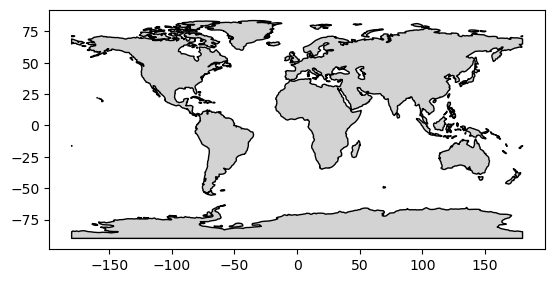

In [12]:
#Draw map with land
land.plot(color='lightgrey',edgecolor='black')
plt.show()

In [33]:
shp_file=r"C:\E\PyExC\Lec09\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp"

world = gpd.read_file(shp_file)
print(world.crs)
print("World bounds:", world.total_bounds)

EPSG:4326
World bounds: [-180.       -90.       180.        83.64513]


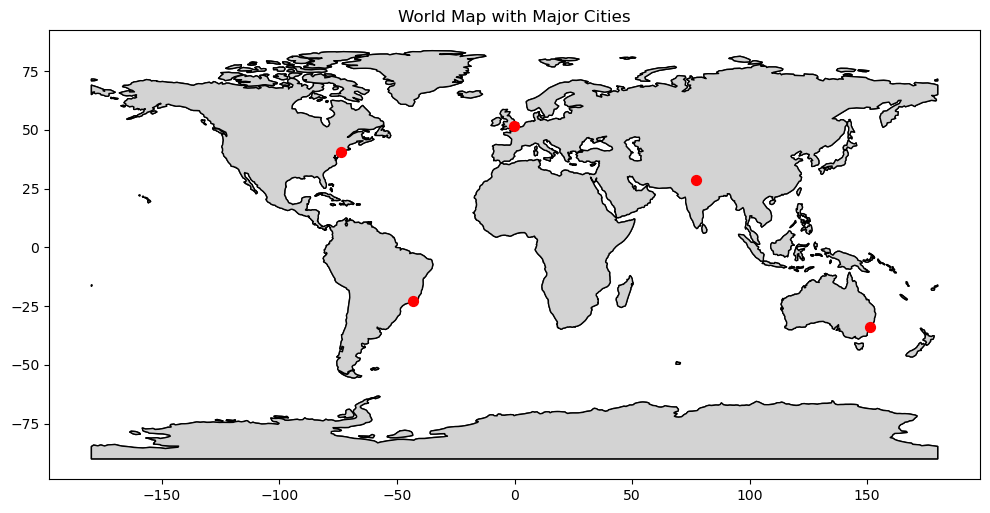

In [44]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Plot the world map on the axis
world.plot(ax=ax,color="lightblue",edgecolor="black")
land.plot(ax=ax,color="lightgrey",edgecolor="black")
# Add Countries

#Overlay citeis on the same axis
cities.plot(ax=ax,color="red",markersize=50)

plt.title("World Map with Major Cities")
plt.tight_layout()
plt.show()



# Choropleth Map of World Population

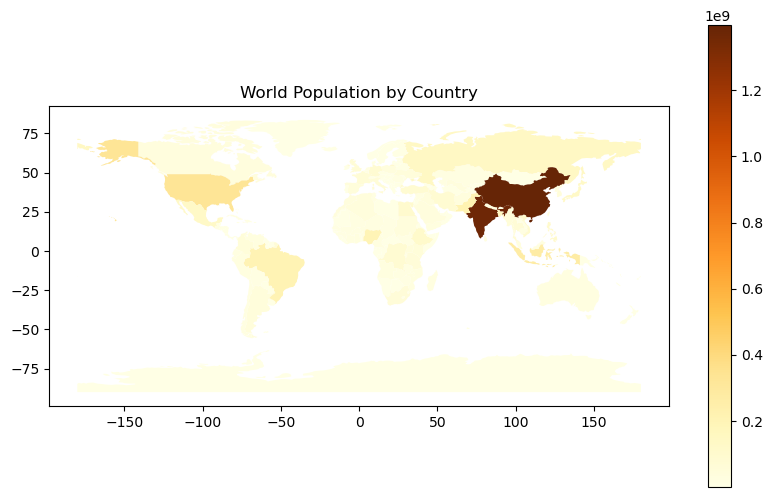

In [46]:
world.plot(column="POP_EST", cmap="YlOrBr", legend=True, figsize=(10,6))
plt.title("World Population by Country")
plt.show()

0    898.20
1     83.99
2     53.12
3    311.80
4     67.75
Name: Population, dtype: float64


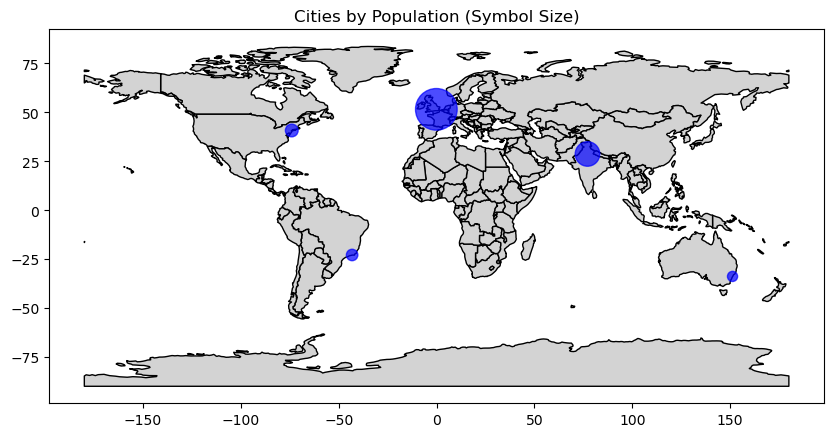

In [48]:
# Adding a 'Population' Column to Cities
cities['Population'] = [89820000,8399000,5312000,31180000,6775000]

print(cities["Population"]/100000)
# Create figure and axis
fig, ax = plt.subplots(figsize=(10,6))

# Plot boackgorund map
world.plot(ax=ax, color="lightgrey",edgecolor="black")

# Plot cities with size proportional to population
cities.plot(ax=ax, color="blue", markersize=cities["Population"]/100000,alpha=0.7)

plt.title("Cities by Population (Symbol Size)")
plt.show()

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [55]:
import folium


# Create a base map centered roughly on the world's center of population (or any

m = folium.Map(location=[20, 0], zoom_start=2)  # Latitude 20, Longitude 0; zoom


# Add the world GeoDataFrame as a GeoJSON layer

folium.GeoJson(world).add_to(m)

# Display the map (in a Jupyter notebook, this will show inline; otherwise, save

m

m.save(r"C:\E\PyExC\Lec09\map.html")


In [61]:
# Create a new Folium map
m_choropleth = folium.Map(location=[20, 0], zoom_start=2)

# Add a choropleth layer
folium.Choropleth(
geo_data=world,  # GeoJSON data
data=world,  # Data to bind
columns=['NAME_EN', 'POP_EST'], # Columns: key (country name) and value (popula
key_on='feature.properties.NAME_EN', # Path to key in GeoJSO
fill_color='YlOrRd', # Color scale
legend_name='Estimated Population'
).add_to(m_choropleth)


# Optionally, add a layer control (if multiple layers) folium.LayerControl().add_to(m_choropleth)

m_choropleth
m_choropleth.save(r"C:\E\PyExC\Lec09\map_choro.html")

In [71]:
# Basic Interactive Map with Folium

import folium

# Set Center as New York City -74.0060 , 40.7128
m = folium.Map(location=[40.7,-74], zoom_start=10)

# Display the map
m

m.save(r"C:\E\PyExC\Lec09\map_nyc.html")

In [73]:
# Basic Interactive Map with Folium

import folium

# Set Center
m = folium.Map(location=[40.7,-74], zoom_start=2)

# Add the world GeoDataFrame as a GeoJSON layer
folium.GeoJson(world).add_to(m)

# Display the map
m

#m.save(r"C:\E\PyExC\Lec09\map_nyc.html")

In [76]:
# Choropleth map with Folium

m_choro = folium.Map(location=[20,0],zoom_start=2)

# Add a choropleth layer
folium.Choropleth(
    geo_data = world, # GeoJSON data
    data = world, # Data to bind
    columns = ['NAME_EN','POP_EST'],
    key_on='feature.properties.NAME_EN',
    fill_color="YlOrRd",
    legend_name = "Estimated Population"
).add_to(m_choro)

folium.LayerControl().add_to(m_choro)

# Display the map
m_choro
#m_choro.save(r"C:\E\PyExC\Lec09\map_choro.html")